*This notebook was created by Sergey Tomin (sergey.tomin@desy.de). Source and license info is on [GitHub](https://github.com/ocelot-collab/ocelot). April 2020.
Introduced a few little examples with new features, June 2023, Sergey*

# An Introduction to Ocelot

Ocelot is a multiphysics simulation toolkit designed for studying Free Electron Lasers (FEL) and storage ring-based light sources. Implemented in Python, Ocelot caters to researchers seeking the flexibility provided by high-level languages like Matlab and Python. Its core principle revolves around scripting beam physics simulations in Python, utilizing Ocelot's modules and extensive collection of Python libraries.

Users developing high-level control applications can accelerate development by using physics models from Ocelot and Python graphics libraries such as [PyQt](http://pyqt.sourceforge.net/Docs/PyQt5/) and [PyQtGraph](http://www.pyqtgraph.org/) to create a GUI. 

Developing machine learning (ML) applications for accelerators can also benefit from using Ocelot, as many popular ML frameworks are written in Python. Ocelot provides a seamless connection between physics and ML methods, making it easier to integrate physical accelerator simulators with machine learning algorithms.

> 🔗 Visit the project website: [https://www.ocelot-collab.com](https://www.ocelot-collab.com)

## Requirements
-  Python 3.9+
- [`numpy`](https://numpy.org/) version 1.8 or higher
- [`scipy`](https://scipy.org/) version 0.15 or higher
- [`matplotlib`](https://matplotlib.org/) version 1.5 or higher
- [`h5py`](https://www.h5py.org/) version 3.10 or higher

**Orbit Correction module is required**
- [`pandas`](https://pandas.pydata.org/)

**Optional**, but highly recommended for speeding up calculations
- [`numexpr`](https://numexpr.readthedocs.io/en/latest/user_guide.html) (version 2.6.1 or higher)
- [`pyfftw`](https://pyfftw.readthedocs.io/en/latest/) (version 0.10 or higher)
- [`numba`](https://numba.pydata.org/)


## Installation
<a id='installation'></a>

### 1. Install via Anaconda Cloud

The easiest way to install OCELOT is through Anaconda Cloud. Use the following command:

```bash
$ conda install -c ocelot-collab ocelot
```

### 2. Install from GitHub (for advanced users)
If you’re comfortable with Git and Python, you can clone OCELOT from GitHub:
```
$ git clone https://github.com/ocelot-collab/ocelot.git
```
Alternatively, you can download the latest release as a [zip file](https://github.com/ocelot-collab/ocelot/archive/refs/heads/master.zip).

To install OCELOT from source:
```
$ python setup.py install
```

### 3. Install by Setting the Python Path

If you'd like to manually install OCELOT, follow these steps:

1. Download the [ZIP file](https://github.com/ocelot-collab/ocelot/archive/master.zip) from GitHub.
2. Unzip the file `ocelot-master.zip` to your working directory, e.g., `/your_working_dir/`.
3. Add the directory `../your_working_dir/ocelot-master` to your `PYTHONPATH`:

    - **Windows:**
        1. Go to **Control Panel** → **System and Security** → **System** → **Advanced System Settings** → **Environment Variables**.
        2. Under **User variables**, add `../your_working_dir/ocelot-master/` to `PYTHONPATH`. If `PYTHONPATH` does not exist, create it.

        **Variable name:** `PYTHONPATH`

        **Variable value:** `../your_working_dir/ocelot-master/`

    - **Linux/macOS:**

    ```bash
    $ export PYTHONPATH=/your_working_dir/ocelot-master:$PYTHONPATH
    ```

## Ocelot main modules:
<a id='modules'></a>

* **Charged particle beam dynamics module (CPBD)**
    - optics
    - tracking
    - matching
    - collective effects (description can be found [here](http://vrws.de/ipac2017/papers/wepab031.pdf) and [here](https://journals.aps.org/prab/abstract/10.1103/PhysRevAccelBeams.22.024401))
        - Space Charge (3D Laplace solver)
        - CSR (Coherent Synchrotron Radiation) (1D model with arbitrary number of dipoles).
        - Wakefields (Taylor expansion up to second order for arbitrary geometry).
    - MOGA (Multi Objective Genetics Algorithm) [ref](http://accelconf.web.cern.ch/AccelConf/ipac2016/papers/thpmb034.pdf).
* **Native module for spontaneous radiation calculation** (some details can be found [here](http://accelconf.web.cern.ch/AccelConf/ipac2019/papers/wepts017.pdf) and [here](http://scripts.iucr.org/cgi-bin/paper?S1600577519002509))
* **FEL calculations: interface to GENESIS and pre/post-processing**
* **Modules for online beam control and online optimization of accelerator performances.**   [ref1](http://accelconf.web.cern.ch/accelconf/IPAC2014/papers/mopro086.pdf), [ref2](https://jacowfs.jlab.org/conf/y15/ipac15/prepress/TUPWA037.PDF), [ref3](http://accelconf.web.cern.ch/AccelConf/ipac2016/papers/wepoy036.pdf), [ref4](https://arxiv.org/pdf/1704.02335.pdf).
    - This module is being developed in collaboration with SLAC. The module has been migrated to a separate [repository](https://github.com/ocelot-collab/optimizer) (in [ocelot-collab](https://github.com/ocelot-collab) organization) for ease of collaborative development.

Ocelot extensively  uses Python's [NumPy (Numerical Python)](http://numpy.org) and [SciPy (Scientific Python)](http://scipy.org) libraries, which enable efficient in-core numerical and scientific computation within Python and give you access to various mathematical and optimization techniques and algorithms. To produce high quality figures Python's [matplotlib](http://matplotlib.org/index.html) library is used.

It is an open source project and it is being developed by physicists from  [The European XFEL](http://www.xfel.eu/), [DESY](http://www.desy.de/) (Germany), [NRC Kurchatov Institute](http://www.nrcki.ru/) (Russia).



In [1]:
from IPython.display import Image
# Image(filename='gui_example.png')

# Tutorials
<a id='tutorials'></a>

The current tutorials are available at [https://www.ocelot-collab.com/docs/tutorial/intro](https://www.ocelot-collab.com/docs/tutorial/intro).  
They are based on Jupyter notebooks, which can be accessed via links provided on each tutorial page or directly on GitHub in the [`ocelot/demos/ipython_tutorials`](https://github.com/ocelot-collab/ocelot/tree/master/demos/ipython_tutorials) folder.

## Beam dynamics

Before starting with the tutorials, we recommend looking at [**Ocelot for Students**](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/for_students) — a beginner-friendly example aimed at students and newcomers to accelerator physics. This tutorial keeps things simple and interactive to help build intuition about how magnetic elements work.

---
* [Tutorial N1. Linear optics. Double Bend Achromat](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/dba)
    - Linear optics. Double Bend Achromat (DBA). Simple example of usage OCELOT functions to get periodic solution for a storage ring cell. 
* [Tutorial N2. Tracking.](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/tracking)
    - Linear optics of the European XFEL Injector. 
    - Tracking. First and second order. 
    - Artificial beam matching - BeamTransform
* [Tutorial N3. Space Charge.](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/space_charge)
    - Tracking through RF cavities with SC effects and RF focusing.
* [Tutorial N4. Wakefields.](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/wake)
    - Tracking through corrugated structure (energy chirper) with Wakefields
* [Tutorial N5. CSR.](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/CSR)
    - Tracking trough bunch compressor with CSR effect.
* [Tutorial N6. RF Coupler Kick.](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/coupler_kick)
    - Coupler Kick. Example of RF coupler kick influence on trajectory and optics.
* [Tutorial N7. Lattice design.](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/lattice_design)
    - Lattice design, twiss matching, twiss backtracking 
* [Tutorial N8. Physics process addition. Laser heater](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/laser_heater)
    - Theory of Laser Heater, implementation of new Physics Process, track particles w/o laser heater effect.   
* [Tutorial N9. Simple accelerator based THz source](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/thz_source)
    - A simple accelerator with the electron beam formation system and an undulator to generate THz radiation. 
* [Tutorial N10. Corrugated Structure](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/CorrugatedStructures)
    - In this tutorial, a few examples for tracking with parallel-plate corrugated structures are shown. The wakefields model are based on analytical wakefield formulas for flat corrugated structures.
* [Tutorial N11. Optics for High Time Resolution Measurements with TDS](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/slotted_foil)
    - An additional example demonstrating how to modify the beamline optics using Ocelot.
      
## Photon field simulation 

* [PFS tutorial N1. Synchrotron radiation module](https://www.ocelot-collab.com/docs/tutorial/tutorial-photons/pfs_1_synchrotron_radiation)
    - Simple examples how to calculate synchrotron radiation with OCELOT Synchrotron Radiation Module.
* [PFS tutorial N2. Coherent radiation module and RadiationField object](https://www.ocelot-collab.com/docs/tutorial/tutorial-photons/pfs_2_radiation_field)
* [PFS tutorial N3. Reflection from imperfect highly polished mirror](https://www.ocelot-collab.com/docs/tutorial/tutorial-photons/pfs_3_imperfect_mirror)
* [PFS tutorial N4. Converting synchrotron radiation Screen object to RadiationField object for viewing and propagation](./tutorial-photons/pfs_4_synchrotron_radiation_visualization.md)
* [PFS tutorial N5: SASE estimation and imitation](https://www.ocelot-collab.com/docs/tutorial/tutorial-photons/pfs_5_SASE_Estimator_and_Imitator)
* [PFS tutorial N6: Spectral Filtering](https://www.ocelot-collab.com/docs/tutorial/tutorial-photons/pfs_6_spectral_filtering)

## Appendixes
* [Undulator matching](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/undulator_matching)
    - brief theory and example in OCELOT
* [Some useful OCELOT functions](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/small_useful_features)
  
    A collection of small but handy features in Ocelot:
    - Aperture
    - Losses along accelerator lattice
    - RK tracking
    - Dump the beam distribution at a specific location of the lattice
    - Energy jitter. Or simulation of the jitter in the RF parameters.
    - Get Twiss parameters from the beam slice
    - Transfer Maps in Ocelot. Global assignment and for specific elements
* [Example of an accelerator section optimization](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/accelerator_optim)
    - A simple demo of accelerator section optimization with a standard scipy numerical optimization method. 
* [Optics Design for High Time Resolution with TDS](https://www.ocelot-collab.com/docs/tutorial/tutorial-beam-dynamics/optics_design)  
  An example demonstrating how to perform optics matching in Ocelot to improve time resolution when using a Transverse Deflecting Structure (TDS).

### Checking your installation

You can run the following code to check the versions of the packages on your system:

(in IPython notebook, press `shift` and `return` together to execute the contents of a cell)

In [1]:
import IPython
print('IPython:', IPython.__version__)

import numpy
print('numpy:', numpy.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import ocelot
print('ocelot:', ocelot.__version__)

IPython: 8.20.0
numpy: 1.26.3
scipy: 1.11.4
matplotlib: 3.8.2
initializing ocelot...
ocelot: 24.03.0


<a id="tutorial1"></a>
## Tutorial N1. Double Bend Achromat.

We designed a simple lattice to demonstrate the basic concepts and syntax of the optics functions calculation. 
Also, we chose DBA to demonstrate the periodic solution for the optical functions calculation. 

In [2]:
from __future__ import print_function

# the output of plotting commands is displayed inline within frontends, 
# directly below the code cell that produced it
%matplotlib inline

# import from Ocelot main modules and functions
from ocelot import *

# import from Ocelot graphical modules
from ocelot.gui.accelerator import *

## Creating lattice
Ocelot has following elements: Drift, Quadrupole, Sextupole, Octupole, Bend, SBend, RBend, Edge, Multipole, Hcor, Vcor, Solenoid, Cavity, Monitor, Marker, Undulator. 

In [3]:
# defining of the drifts
D1 = Drift(l=2.)
D2 = Drift(l=0.6)
D3 = Drift(l=0.3)
D4 = Drift(l=0.7)
D5 = Drift(l=0.9)
D6 = Drift(l=0.2)

# defining of the quads
Q1 = Quadrupole(l=0.4, k1=-1.3)
Q2 = Quadrupole(l=0.8, k1=1.4)
Q3 = Quadrupole(l=0.4, k1=-1.7)
Q4 = Quadrupole(l=0.5, k1=1.3)

# defining of the bending magnet
B = Bend(l=2.7, k1=-.06, angle=2*pi/16., e1=pi/16., e2=pi/16.)

# defining of the sextupoles
SF = Sextupole(l=0.01, k2=1.5) #random value
SD = Sextupole(l=0.01, k2=-1.5) #random value

# cell creating
cell = (D1, Q1, D2, Q2, D3, Q3, D4, B, D5, SD, D5, SF, D6, Q4, D6,
        SF, D5, SD, D5, B, D4, Q3, D3, Q2, D2, Q1, D1)

In [4]:
cell

(<Drift: name=ID_41638795_ at 0x2815f6aa0>,
 <Quadrupole: name=ID_48212357_ at 0x2815f5d50>,
 <Drift: name=ID_92167354_ at 0x2815f6260>,
 <Quadrupole: name=ID_62144763_ at 0x2815f5de0>,
 <Drift: name=ID_65974384_ at 0x2815f69e0>,
 <Quadrupole: name=ID_10916876_ at 0x2815f5db0>,
 <Drift: name=ID_95483235_ at 0x2815f4850>,
 <Bend: name=ID_90868229_ at 0x2815f5f60>,
 <Drift: name=ID_55934688_ at 0x2815f4ac0>,
 <Sextupole: name=ID_22464080_ at 0x11818fee0>,
 <Drift: name=ID_55934688_ at 0x2815f4ac0>,
 <Sextupole: name=ID_30803941_ at 0x2815f5ff0>,
 <Drift: name=ID_49578218_ at 0x2815f4eb0>,
 <Quadrupole: name=ID_27836471_ at 0x2815f5ed0>,
 <Drift: name=ID_49578218_ at 0x2815f4eb0>,
 <Sextupole: name=ID_30803941_ at 0x2815f5ff0>,
 <Drift: name=ID_55934688_ at 0x2815f4ac0>,
 <Sextupole: name=ID_22464080_ at 0x11818fee0>,
 <Drift: name=ID_55934688_ at 0x2815f4ac0>,
 <Bend: name=ID_90868229_ at 0x2815f5f60>,
 <Drift: name=ID_95483235_ at 0x2815f4850>,
 <Quadrupole: name=ID_10916876_ at 0x2815f

*hint: to see a simple description of the function put cursor inside () and press **Shift-Tab** or you can type sign **?** before function. To extend dialog window press **+** *
Also, one can get more info about element just using ```print(element)```

In [5]:
# all infro about an element can be seen with 
print(B)

Bend(l=2.70000, angle=3.926991e-01, e1=1.963495e-01, e2=1.963495e-01, eid="ID_90868229_")


The cell is a list of the simple objects which contain a physical information of lattice elements such as length, strength, voltage and so on. In order to create a transport map for every element and bind it with lattice object we have to create new Ocelot object - MagneticLattice() which makes these things automatically. 

```MagneticLattice(sequence, start=None, stop=None, method={"global": TransferMap})```:     
* sequence - list of the elements,

other parameters we will consider in tutorial N2. 

<mark>Note, in the current version of OCELOT, transfer map belongs to element. See example</mark>

In [6]:
# R matrix can be printed for any particular element.
print(Q1.R(energy=0))

[array([[ 1.10581521,  0.4140116 ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.53821508,  1.10581521,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.89779021,  0.38627683,  0.        ,
         0.        ],
       [ 0.        ,  0.        , -0.50215988,  0.89779021,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])]


In [7]:
# or you can directly get transfer maps 
Q2.tms

In [8]:
lat = MagneticLattice(cell)

# to see total lenth of the lattice 
print("length of the cell: ", lat.totalLen, "m")

# or, for example, you can get R matrix for whole lattice

B, R, T = lat.transfer_maps(energy=0)
print(R)

length of the cell:  20.34 m
[[ 0.68401288  0.38454837  0.          0.          0.          0.05268746]
 [-1.38376969  0.68401288  0.          0.          0.          0.23072876]
 [ 0.          0.          0.81775255 -0.29733817  0.          0.        ]
 [ 0.          0.          1.11415489  0.81775255  0.          0.        ]
 [ 0.23072876  0.05268746  0.          0.          1.          0.02228572]
 [ 0.          0.          0.          0.          0.          1.        ]]


### Optical function calculation
Uses: 
* twiss() function and,
* Twiss() object contains twiss parameters and other information at one certain position (s) of lattice

To calculate twiss parameters you have to run **twiss(lattice, tws0=None, nPoints=None)** function. If you want to get a periodic solution leave tws0 by default. 

You can change the number of points over the cell, If nPoints=None, then twiss parameters are calculated at the end of each element.
twiss() function returns list of Twiss() objects.

##### You will see the Twiss object contains more information than just twiss parameters. 

In [9]:
tws = twiss(lat, nPoints=1000)

# to see twiss paraments at the begining of the cell, uncomment next line
# print(tws[0])
print("length = ", len(tws))
# to see twiss paraments at the end of the cell, uncomment next line
print(tws[-1])

length =  1000
emit_x  = 0.0
emit_y  = 0.0
beta_x  = 0.5271613695963895
beta_y  = 0.5165977895295946
alpha_x = -4.440892098500626e-16
alpha_y = 6.661338147750939e-15
gamma_x = 1.8969523521149319
gamma_y = 1.9357419258618653
Dx      = 0.16673927708143915
Dy      = 0.0
Dxp     = 4.440892098500626e-16
Dyp     = 0.0
mux     = 7.100731992120578
muy     = 5.669884351617213
nu_x    = 1.1301165961167512
nu_y    = 0.9023901213192655
E       = 0.0
s        = 20.34



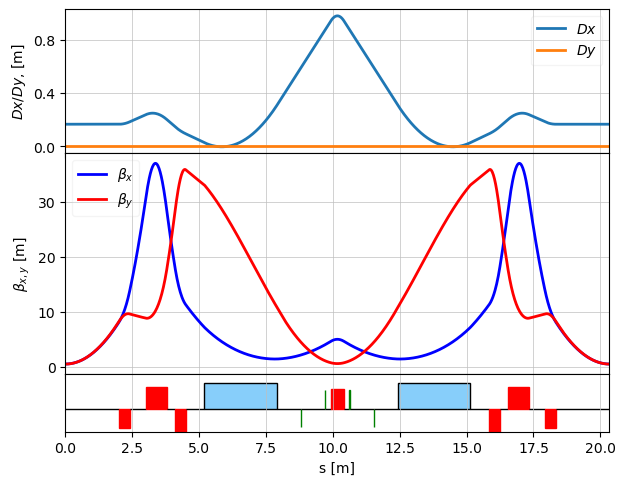

In [10]:
# plot optical functions.
plot_opt_func(lat, tws, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

# you also can use standard matplotlib functions for plotting
#s = [tw.s for tw in tws]
#bx = [tw.beta_x for tw in tws]
#plt.plot(s, bx)
#plt.show()

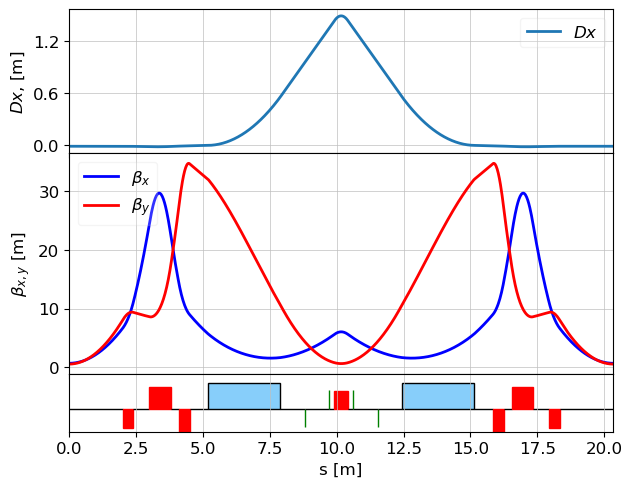

In [11]:
# you can play with quadrupole strength and try to make achromat
Q4.k1 = 1.18

# to make achromat uncomment next line
# Q4.k1 =  1.18543769836
# To use matching function, please see ocelot/demos/ebeam/dba.py 

# updating transfer maps after changing element parameters. 
#lat.update_transfer_maps() - not needed anymore

# recalculate twiss parameters. Argument nPoints is None by default - Twiss is calculating at the end of each element. 
# If you want smooth twiss functions you can set number of points. 
tws=twiss(lat, nPoints=1000)

plot_opt_func(lat, tws, legend=False)
plt.show()

# More about periodic solution for the Twiss function
In some cases, one needs to quickly find a periodic solution. Here is a simple example with Cavity element:

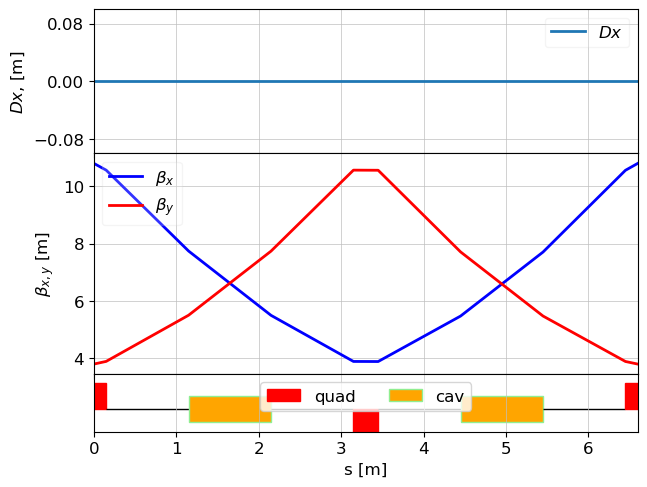

final Twiss: emit_x  = 0.0
emit_y  = 0.0
beta_x  = 10.788391405898434
beta_y  = 3.804736768160358
alpha_x = -0.009168816187736392
alpha_y = -0.005202303371245248
gamma_x = 0.09270001704271681
gamma_y = 0.26283738531638107
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 1.0722774502509878
muy     = 1.0719541872890197
nu_x    = 0.1706582565734186
nu_y    = 0.17060680767510286
E       = 0.6969615506024416
s        = 6.6



In [12]:
d = Drift(l=1)
qf_h = Quadrupole(l=0.3/2, k1=1)
qd = Quadrupole(l=0.3, k1=-1)
c = Cavity(l=1, v=0.1, phi=10)

fodo_cell = (qf_h, d, c, d, qd, d,c,d,qf_h)
lat = MagneticLattice(fodo_cell)

tws0 = Twiss(E=0.5) # E = 0.5 GeV. Initial energy is required for the focusing effect caclulation in the Cavities 
tws = twiss(lat, tws0)
plot_opt_func(lat, tws)
plt.show()
print("final Twiss:", tws[-1])

### another way to get periodic solution is 

In [13]:
tws_p = lat.periodic_twiss(tws=tws0)
print(tws_p)

emit_x  = 0.0
emit_y  = 0.0
beta_x  = 10.788391405898436
beta_y  = 3.804736768160356
alpha_x = -0.00916881618773698
alpha_y = -0.005202303371245172
gamma_x = 0.0927000170427168
gamma_y = 0.26283738531638123
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 0.0
muy     = 0.0
nu_x    = 0.0
nu_y    = 0.0
E       = 0.5
s        = 0.0

